In [46]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from math import pi
from utils import data_treatment
import autolab.autolab

In [2]:
path = "G:\\Andere Computer\\My Computer\\HPS Data\\SECM Software Measurements\\230621"
os.listdir(path)
def filename (number: str) -> str:
    return f"{number} Linear Sweep Voltammetry.dat"

def area_circle(diameter: float) -> float:
    return pi * (0.5 * diameter)**2

def current_density(current):
    area = area_circle(0.05)
    return current/area

filename_list = ["002", "004", "007"]

# for file in filename_list:
#     full_path = os.path.join(path, filename(file))
#     df = pd.read_table(full_path, sep = ",", skiprows = 14)
#     df["current density"] = df[" Current WE1 [A]"].map(current_density)
#     plt.plot(df["# Potential [V]"], df[" Current WE1 [A]"], label = file)
#     plt.legend()
#     plt.xlabel("Potential [V]")
#     plt.ylabel("current density [j/ cm^2]")

In [ ]:
df = pd.read_table(full_path, sep = ",", skiprows= 14)
df

In [ ]:
df["current density"] = df[" Current WE1 [A]"].map(current_density)

In [ ]:
plt.plot(df["# Potential [V]"], df["current density"])

In [7]:
config = {
    'adk': 'E:\\Metrohm\\config\\Adk',
    'sdk': 'E:\\Metrohm\\EcoChemie.Autolab.Sdk',
    'hsf': 'E:\\Metrohm\\Hardware Setup Files\\PGSTAT302N\\HardwareSetup.xml',
    'sim': False
}
potentiostat = autolab.autolab.potentiostat(config)

In [8]:
directory = os.path.join(data_treatment.gdrive_path, "sdc experiments")
files = os.listdir(directory)

In [ ]:
for file in files:
    df = potentiostat.nox_parser(os.path.join(directory,file), "LSV staircase")
    plt.figure()
    plt.plot(df["Potential applied"], df["WE(1).Current"], label = file)
plt.show

In [10]:
name = "line sweep"

for n in range(5):
    filename = os.path.join(path, f"secmpy semiauto test {n}.nox")
    print(filename)

G:\Andere Computer\My Computer\HPS Data\SECM Software Measurements\230621\secmpy semiauto test 0.nox
G:\Andere Computer\My Computer\HPS Data\SECM Software Measurements\230621\secmpy semiauto test 1.nox
G:\Andere Computer\My Computer\HPS Data\SECM Software Measurements\230621\secmpy semiauto test 2.nox
G:\Andere Computer\My Computer\HPS Data\SECM Software Measurements\230621\secmpy semiauto test 3.nox
G:\Andere Computer\My Computer\HPS Data\SECM Software Measurements\230621\secmpy semiauto test 4.nox


In [11]:
path = "G:\\Andere Computer\\My Computer\\HPS Data\\SECM Software Measurements"
directory_content= os.listdir(path)

In [ ]:
plt.rcParams['figure.dpi'] = 300
for item in directory_content:
    object_path = os.path.join(path, item)
    if os.path.isdir(object_path):
        plt.figure()
        for file in os.listdir(object_path):
            file_path = os.path.join(object_path, file)
            df = pd.read_table(file_path, sep = ",", skiprows = 14)
            df["current density"] = df[" Current WE1 [A]"].map(current_density)
            plt.plot(df["# Potential [V]"], df["current density"], label = file)
            plt.legend()
            plt.xlabel("Potential [V]")
            plt.ylabel("current density [j/ cm^2]")
            

In [13]:
path = "G:\\Andere Computer\\My Computer\\HPS Data\\Autolab\\NovaProcedure"
file = "011_010_NovaProcedure.nox"

OCP Histogram and Statistics on OCP Values


In [70]:
ocp_data = pd.DataFrame(columns= ["OCP value"])
ocp_list = []
file_list = []
for file in os.listdir(path):
    if file.startswith("012_"):
        file_list.append(file)
        procedure = potentiostat.instrument.LoadProcedure(os.path.join(path, file))
        command = procedure.Commands["OCP determination"]
        ocp_list.append(command.Signals.get_Item("OCP value").Value)
ocp_data["OCP value"] = ocp_list

In [71]:
#ocp_data = ocp_data.drop(index = 34)
ocp_data = ocp_data[ocp_data["OCP value"] < 1]
#ocp_data = ocp_data[ocp_data["OCP value"] > -0.8]

OCP value   -0.058349
dtype: float64 mean
OCP value    0.273599
dtype: float64 std
OCP value    0.074856
dtype: float64 variance
OCP value   -0.067072
dtype: float64 median


Text(0.5, 0, 'E [V]')

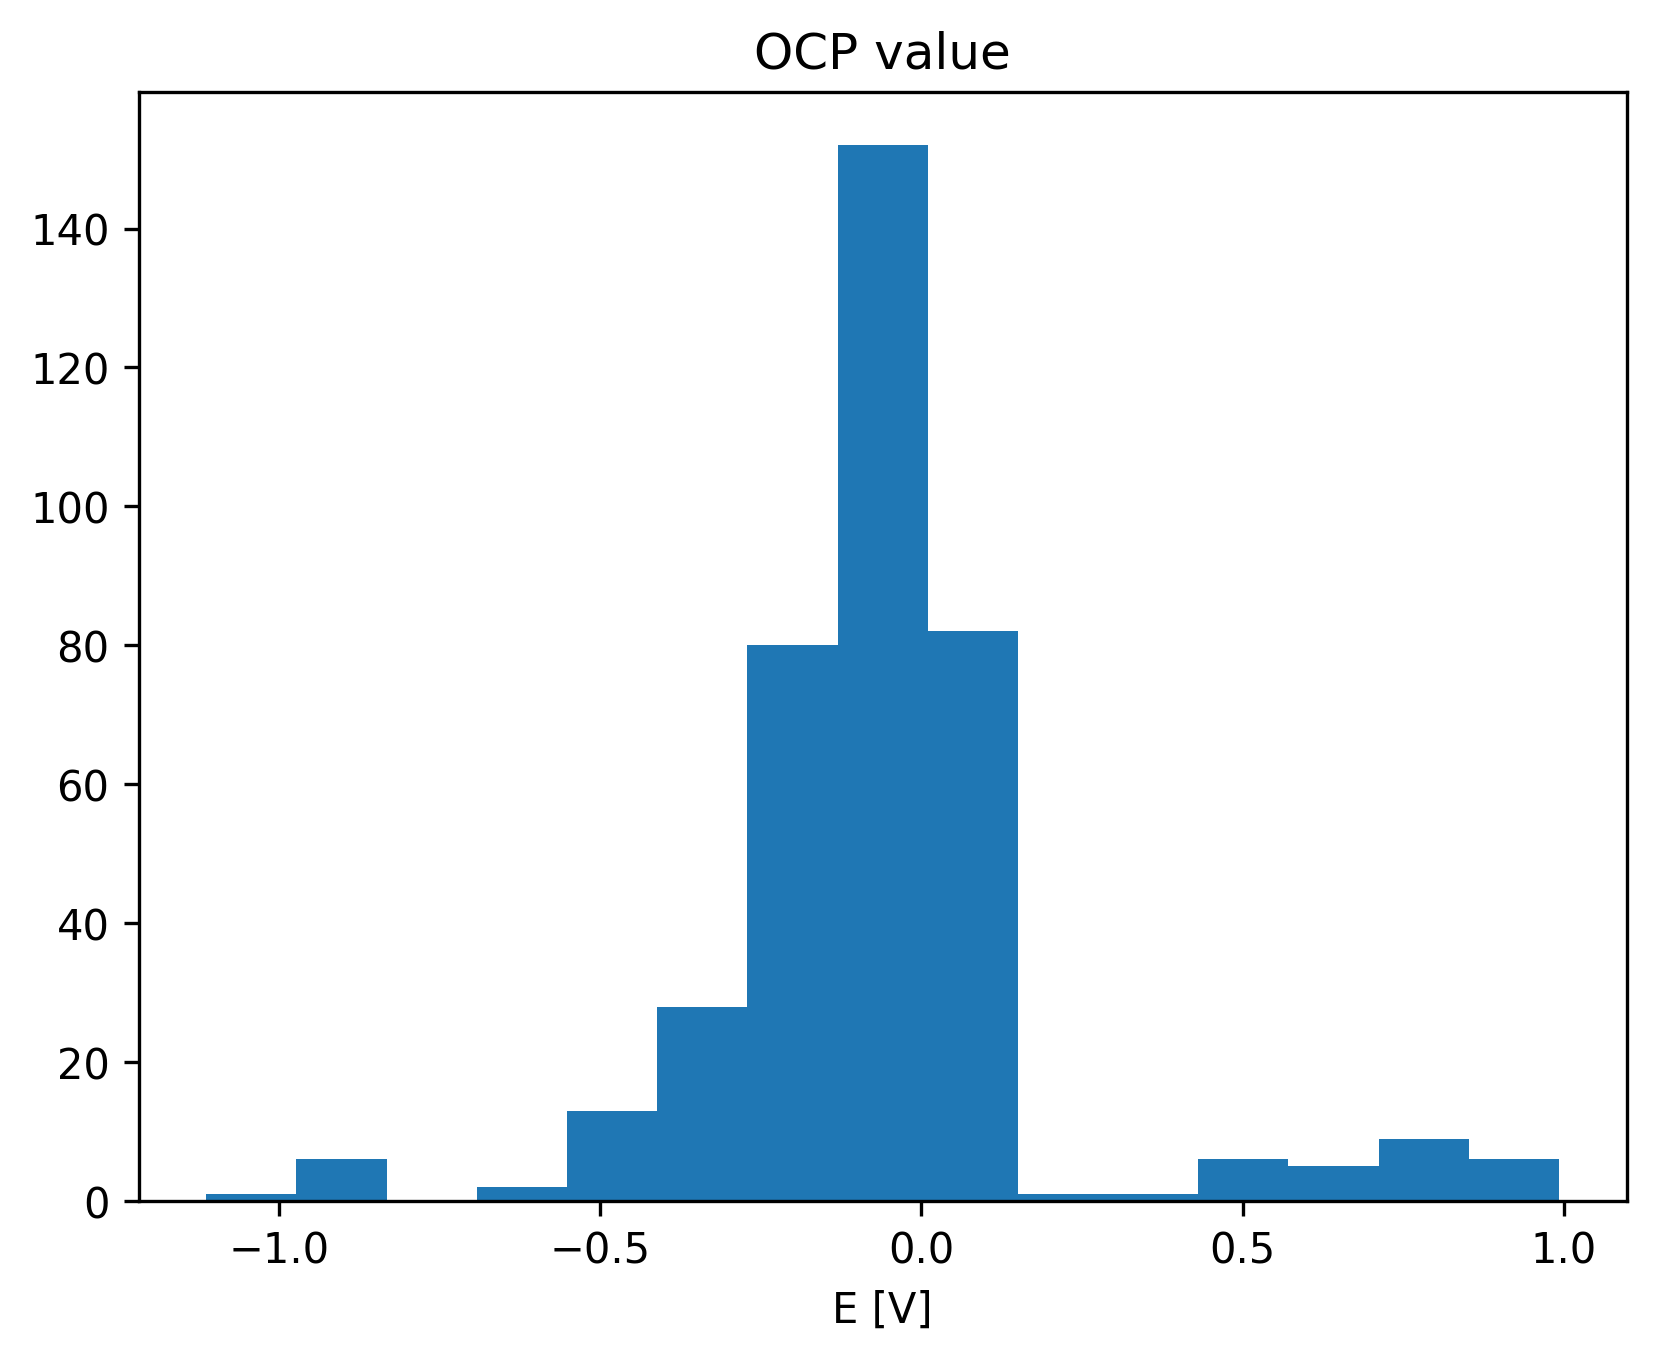

In [73]:
#plt.rcParams['figure.dpi'] = 300
print(ocp_data.mean(), "mean")
print(ocp_data.std(), "std")
print(ocp_data.var(), "variance")
print(ocp_data.median(), "median")
ocp_data.hist(column=["OCP value"], bins = 15)
plt.grid(False)
plt.xlabel("E [V]")
#std_error = (float(ocp_data.std())/np.sqrt(len(ocp_data)))
#error_percent = 100*(std_error/float(ocp_data.mean()))
#error_percent

In [21]:
procedure = potentiostat.instrument.LoadProcedure(os.path.join(path,file))
for command in procedure.Commands.Names:
    print(command)

Cyclic voltammetry potentiostatic
Autolab control
OCP determination
E vs t
Custom
!!Hidden command, this should not be displayed
Set potential
Set cell
Wait time (s)
Optimize current range
CV staircase
i vs E
Set cell


In [ ]:
command = procedure.Commands["CV staircase"]
for column in command.Signals.Names:
    print(command.Signals.get_Item(column).Value)
    print(column)

CV Analysis


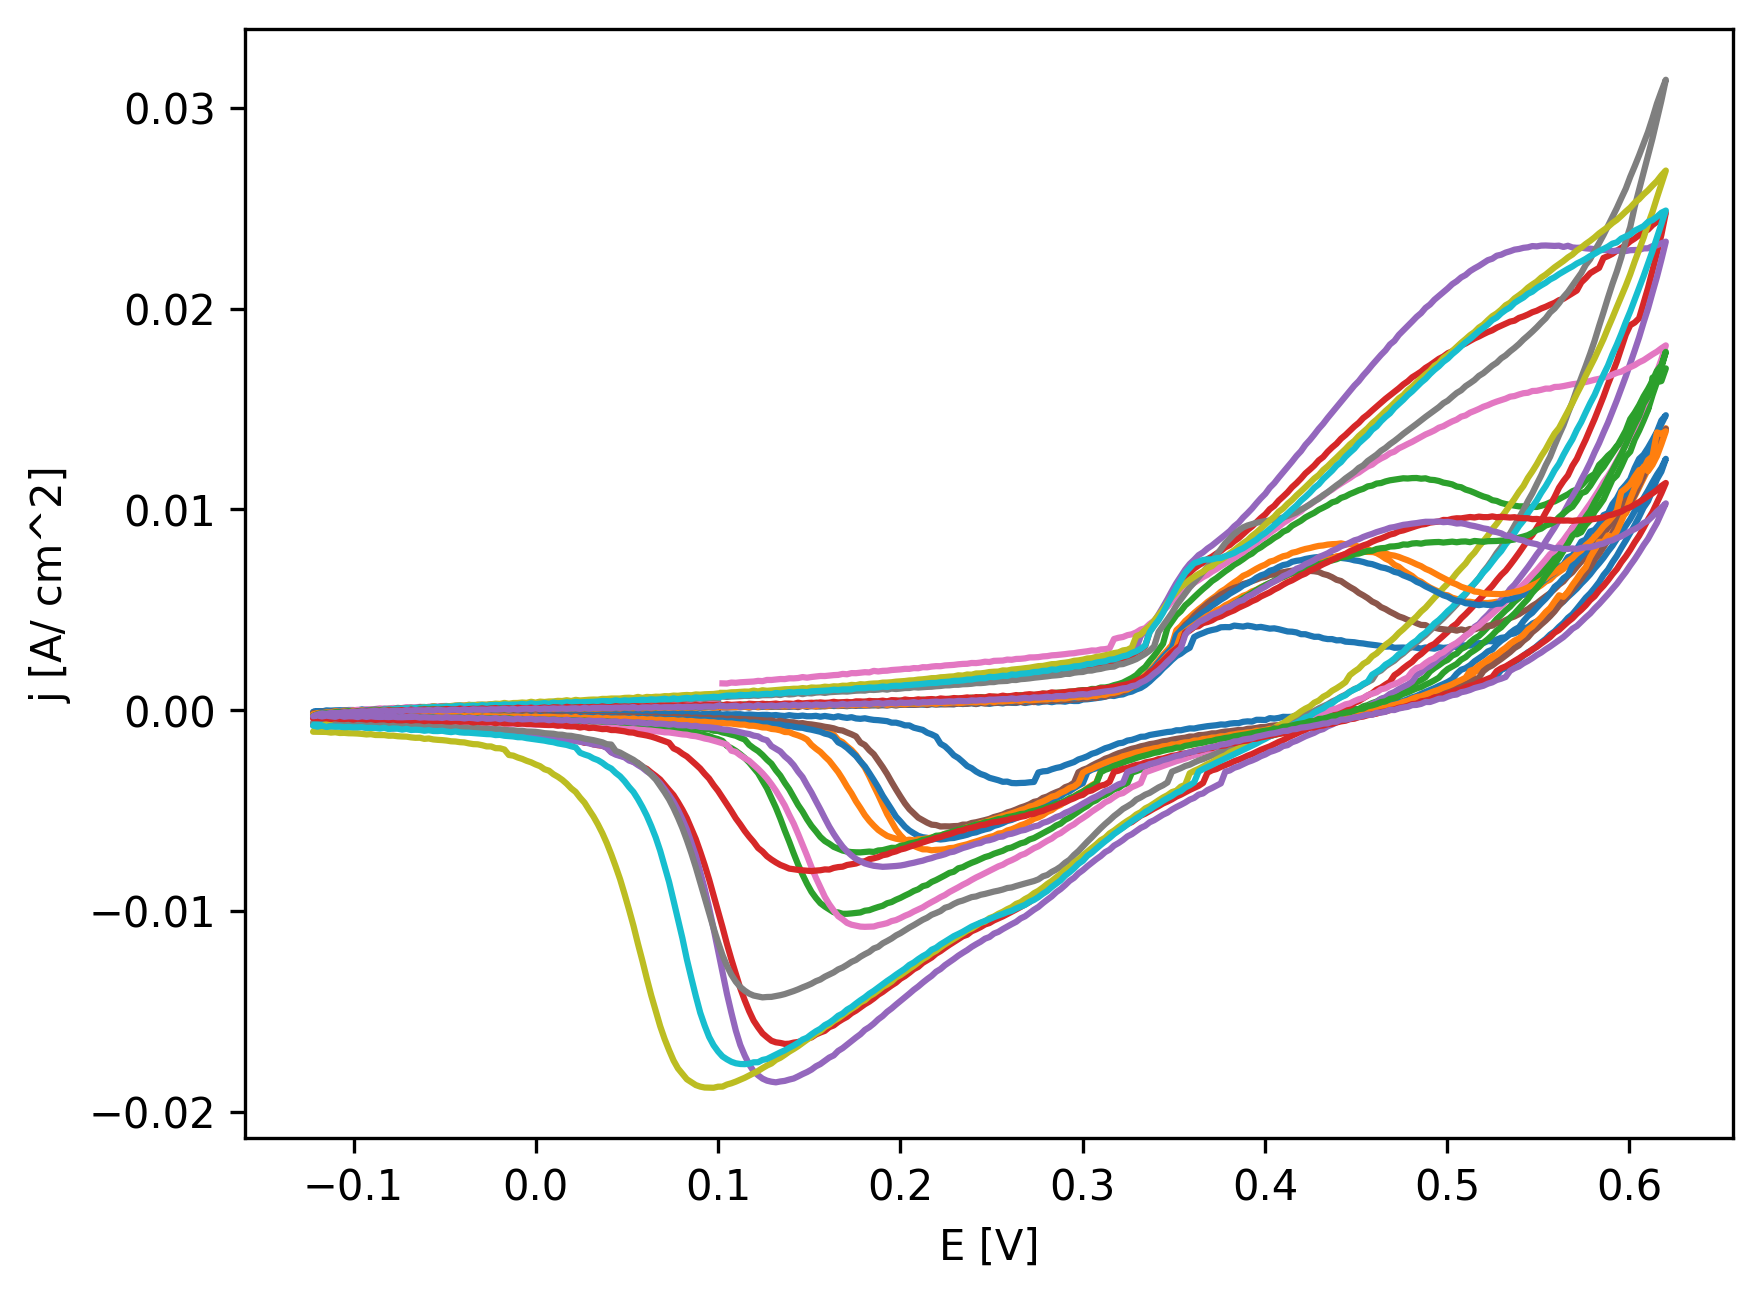

In [105]:
command = procedure.Commands["CV staircase"]
scan = 2
list_of_files = []
for file in os.listdir(path):
    if file.startswith("011_"):
        list_of_files.append(file)

for file in list_of_files[0:15]:
    df = pd.DataFrame()
    procedure = potentiostat.instrument.LoadProcedure(os.path.join(path,file))
    command = procedure.Commands["CV staircase"]
    for column in command.Signals.Names:
        if len(list(command.Signals.get_Item(column).Value)) != 0:
            df[column] = list(command.Signals.get_Item(column).Value)
    df["current density"] = df["WE(1).Current"].map(current_density)
    df = df.loc[df['Scan'] == scan]
    plt.plot(df["Potential applied"], df["current density"], label = file)
    plt.xlabel("E [V]")
    plt.ylabel("j [A/ cm^2]")
    #plt.legend()

C:\Users\Henrik Spitzenpfeil\AppData\Local\Temp\ipykernel_16308\1192516199.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  current_density_aggregated.insert(0,file,df["current density"])
C:\Users\Henrik Spitzenpfeil\AppData\Local\Temp\ipykernel_16308\1192516199.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  current_density_aggregated.insert(0,file,df["current density"])
C:\Users\Henrik Spitzenpfeil\AppData\Local\Temp\ipykernel_16308\1192516199.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually

608 608


C:\Users\Henrik Spitzenpfeil\AppData\Local\Temp\ipykernel_16308\1192516199.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  current_density_aggregated.insert(0,file,df["current density"])
C:\Users\Henrik Spitzenpfeil\AppData\Local\Temp\ipykernel_16308\1192516199.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  current_density_aggregated.insert(0,file,df["current density"])
C:\Users\Henrik Spitzenpfeil\AppData\Local\Temp\ipykernel_16308\1192516199.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually

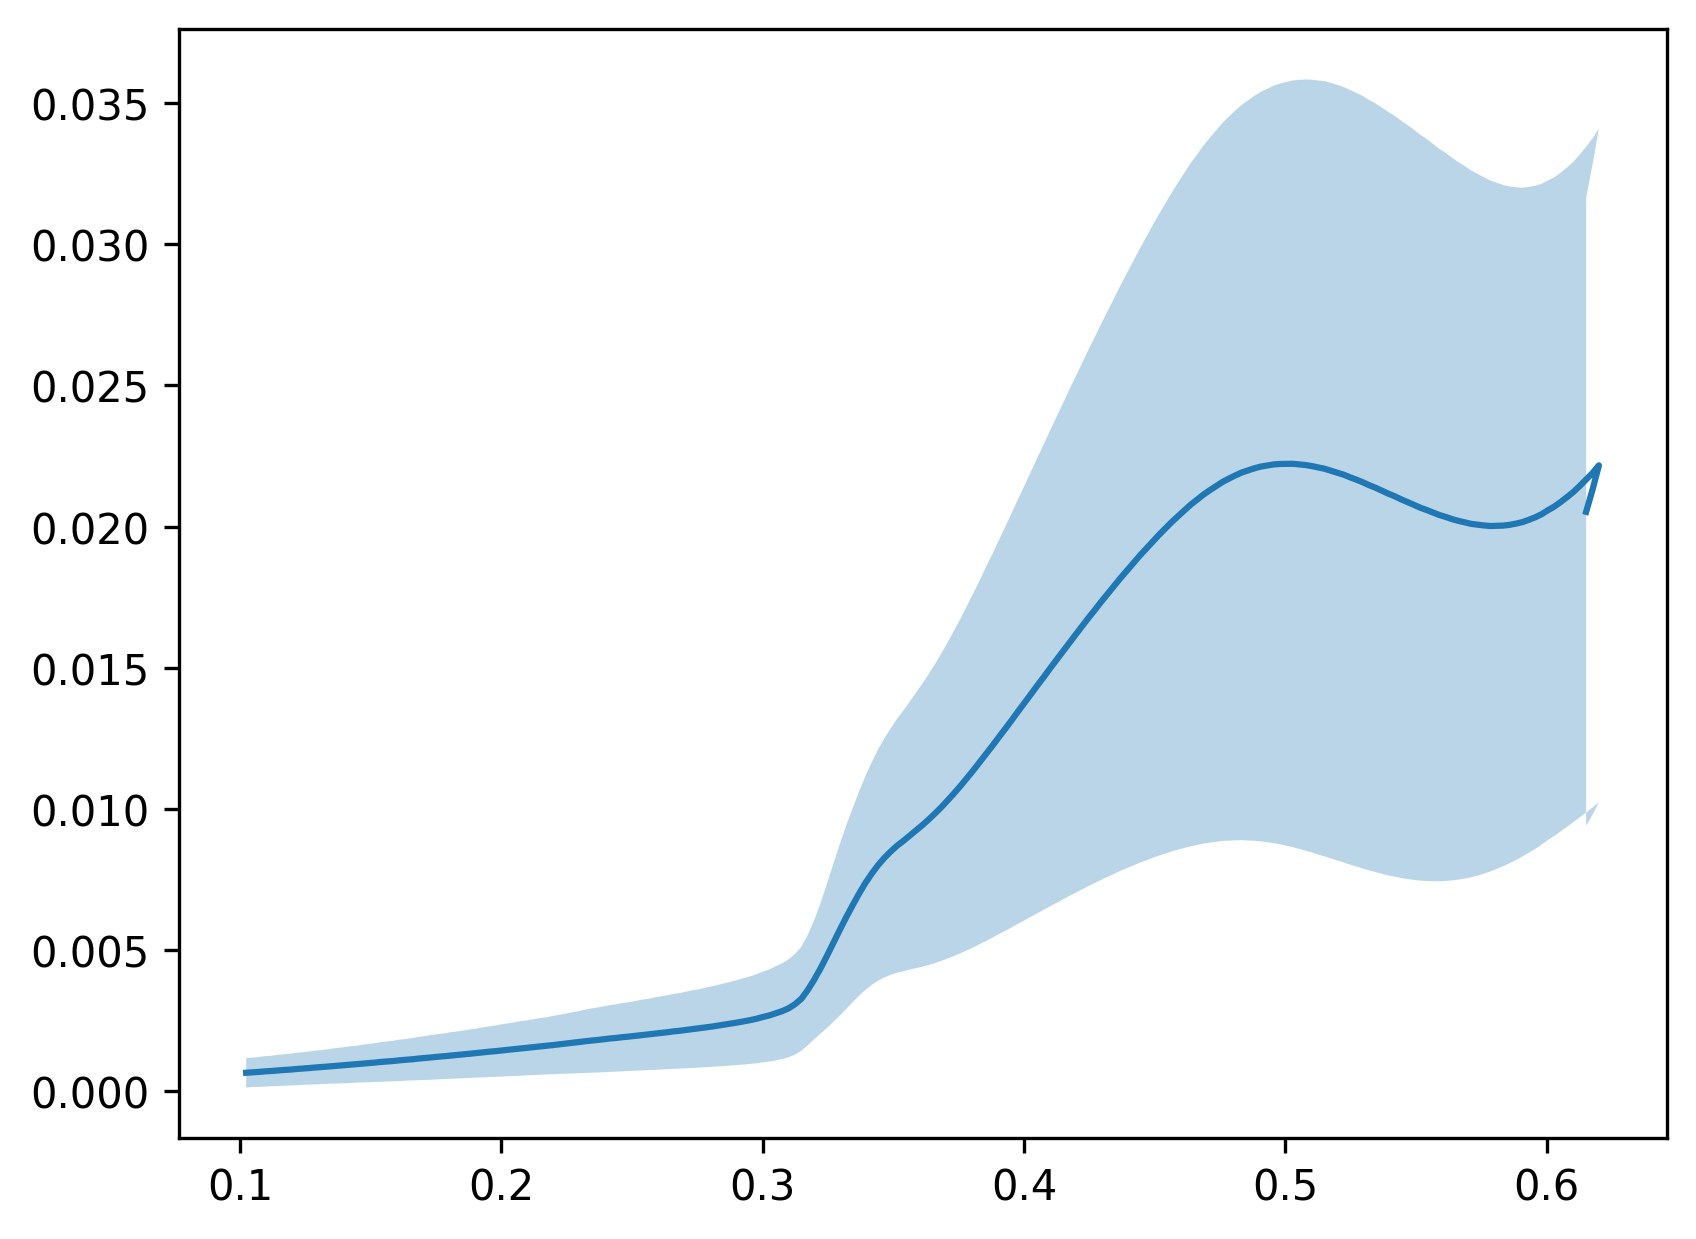

In [104]:
scan == 1
current_density_aggregated = pd.DataFrame()
for file in list_of_files[:]:
    df = pd.DataFrame()
    procedure = potentiostat.instrument.LoadProcedure(os.path.join(path,file))
    command = procedure.Commands["CV staircase"]
    for column in command.Signals.Names:
        if len(list(command.Signals.get_Item(column).Value)) != 0:
            df[column] = list(command.Signals.get_Item(column).Value)
    df["current density"] = df["WE(1).Current"].map(current_density)
    df = df.loc[df['Scan'] == scan]
    current_density_aggregated.insert(0,file,df["current density"])

avarage_cv = np.array(current_density_aggregated.mean(axis=1))
standard_deviations = np.array(current_density_aggregated.std(axis=1))

left_bound = 0
right_bound = 215



print(len(standard_deviations), len(avarage_cv))
plt.plot(df["Potential applied"][left_bound:right_bound], avarage_cv[left_bound:right_bound],)
plt.fill_between(df["Potential applied"][left_bound:right_bound],
                 np.subtract(avarage_cv, standard_deviations)[left_bound:right_bound],
                 np.add(avarage_cv, standard_deviations)[left_bound:right_bound],
                 alpha = 0.3,
                 where= np.subtract(avarage_cv, standard_deviations)[left_bound:right_bound] < np.add(avarage_cv, standard_deviations)[left_bound:right_bound],
                 interpolate= True)

In [ ]:
for scan in range(3):
    df_scan = df.loc[df['Scan'] == scan+1]
    plt.plot(df_scan["Potential applied"], df_scan["current density"], label = file + " " + str(scan))
    plt.legend()
    plt.xlabel("E [V]")
    plt.ylabel("j [A/ cm^2]")